# Assignment 2
## Austin Booth

### Exercise 1

Total antibiotic administered: 928.0 mg


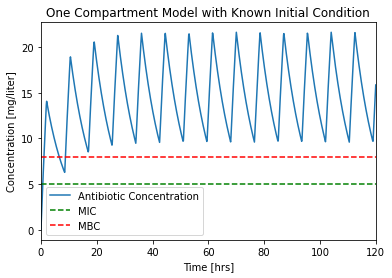

In [17]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# specify parameters
V = 4           # liters
Q = 0.5         # liters/hour
MIC = 5         # mg/liter
MBC = 8         # mg/liter

# define plotting function 
def plotConcentration(soln):
    fig, ax = plt.subplots(1, 1)
    ax.plot(soln.t, soln.y[0])
    ax.set_xlim(0, max(soln.t))
    ax.plot(ax.get_xlim(), [MIC, MIC], 'g--', ax.get_xlim(), [MBC, MBC], 'r--')
    ax.legend(['Antibiotic Concentration','MIC','MBC'])
    ax.set_xlabel('Time [hrs]')
    ax.set_ylabel('Concentration [mg/liter]')
    ax.set_title('One Compartment Model with Known Initial Condition');
    
# define derivative function
def deriv(t, C):
    return u(t)/V - (Q/V)*C

# define dosing function u(t)
def u(t):
    if t <= 0:
        return 0
    elif t % tdose <= dt:
        return Udose/dt
    else:
        return 0

# set parameters for u(t)
dt = 2           # length of administration per dose; assume 2 hours as in the in-class example
tdose = 8.5        # time between doses (hours)
Udose = 64       # mg


# specify time span and evaluation points
t_span = [0, 120]  # set maximum time to 120 hours so there can be at least 96 hours above MBC
t_eval = np.linspace(0, 120, 1000)

# initial conditions
C_initial = 0
IC = [C_initial]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

# display solution
plotConcentration(soln)
plt.savefig('Pharmacokinetics3.png')


# code to calculate total antibiotic administered

# get total treatment time
t_total = t_span[1]

# define remainder to determine if the end of treatment occurs during a dose
t_remain = t_total % tdose

# number of full doses is total time divided by dose time, rounded down
n_fulldoses = np.floor(t_total / tdose)

# if treatment ends during a dose, add the amount from full doses plus the dosage rate times the dosage time
if t_remain <= dt:
    partial_dose = t_remain * Udose/dt
    mg = Udose * n_fulldoses + partial_dose
    
# if not during a dose, just use the amount from full doses
else:
    mg = Udose * n_fulldoses
    
# print result
print('Total antibiotic administered:',mg,'mg')

# result ends up as 928 mg which matches hand calculations, as there are 14 full doses and 1 half dose at 64 mg each    

### Exercise 2

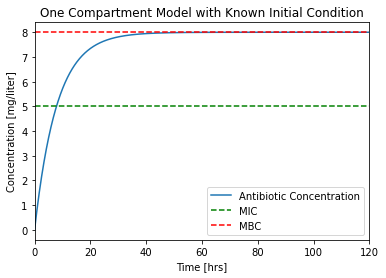

In [18]:
# define dosing function u(t)
def u(t):
    return 4   # constant 4 mg/hr as solved on paper

# specify time span and evaluation points
t_span = [0, 120]  # set maximum time to 120 hours so there can be at least 96 hours above MBC
t_eval = np.linspace(0, 120, 1000)

# initial conditions
C_initial = 0
IC = [C_initial]

# compute solution
soln = solve_ivp(deriv, t_span, IC, t_eval=t_eval, max_step=0.1)

# display solution
plotConcentration(soln)
plt.savefig('Pharmacokinetics3.png')